# Functions

In [40]:
%run 'initialization.ipynb'
%run "Input_selection_functions.ipynb"
%run "Visualization_functions.ipynb"
%run "Downsampling_and_outliers_functions.ipynb"
%load_ext autoreload

----------------------------------------
loaded variables from initialization file: 
> myparams, myconfiguration_file
> list_picked_id_source, list_picked_id_target
> data_folder
----------------------------------------
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### just some handpicked visualization settings for this page

they are fed in "custom_draw_geometry" as for params, ad myconfiguration. 
if you dont want to use them just comment these lines out.

In [19]:
specific_screen, specific_render = specific_visualization_parameters("1Intro")

loaded visualization options
- ../data/1IntroScreenCamera.json 
- ../data/1IntroRenderOption.json


# Intro

This Notebooks gives just an overview of data some basic functions in open3D. 
Having basic knowledge of the domain and open3D package is needed in the next steps. 

## Input selection

Here as default the first set of 30 pictures is selected. 
It is possible though to load other sets calling the function "select_input_files(data_folder)".

From now on for "sequence" we mean a set of data taken with a continuos movement in the same direction. A new sequence starts when the direction is reversed. 

A .txt file per each set is manually created, this contains the labels to identify the sequences, it is relevant to have this prior knowledge to proceed with a successful stitching,as of course knowing the number of pcl in each sequence, which in our case is set to 10. 


In [2]:
# default
all_paths_images,all_paths_ply, num_images,labels,img_folder,ply_folder,all_images,all_ply = load_input(data_folder)

default set:
-imgfolder, contains 30 images 
-plyfolder, contains 30 ply  
found labels file: 
['External', 'Internal', 'Upper']


In [22]:
## uncomment following line to select different ply and img folders as input
all_paths_images,all_paths_ply,num_images,labels,img_folder,ply_folder,all_images,all_ply = select_input_files(data_folder)

default set: 
-imgfolder 
-plyfolder 
do you want to select a different input? [y/n]
n
['imgfolder', 'plyfolder_1']
found labels file: 
['External', 'Internal', 'Upper']


In [23]:
num_img_per_side = 10

## Data visualization and sorting

In the first set of teeth we got 30 images in sequences of 10:
- seq_1: external images are sorted as 0 to 9
- seq_2: internal images are sorted as 9 to 0
- seq_3: upper images are sorted as 0 to 9

In the second set of teeth we got 20 images in sequences of 10:
- seq_1: external images are sorted as 0 to 9
- seq_2: internal images are sorted as 9 to 0

The data is taken with a intradental camera which moves from one side to the other of the mounth, with small movements (2-5mm) which need to guarantee enough overlapping between the pictures/point clouds to allow proper reconstruction. 

From a quick look at the pictures we notice that we always need to reverse the order of the second sequence (seq_1) images and ply (done at the beginning of next notebook).


In [24]:
# read all images
all_images = [cv2.imread(path) for path in all_paths_images]

# create sequences of the same lenght
# eg
# seq_0 = external 
# seq_1 = internal
# seq_2 = upper

list_sequences = list(chunks(all_images, num_img_per_side))
lseq = len(list_sequences)
print (f"Found {lseq} sequences of {num_img_per_side} images each")
for s in list(range(1, lseq, 2)):
    ## reverse sequences 1,3,5...
    print (f"Reversed order of sequence {s}")
    list_sequences[s].reverse()
    

Found 3 sequences of 10 images each
Reversed order of sequence 1


## plot tooth

In [25]:
# tooth 9 out of the 10 
t = 9

In [26]:
# all the visualizations of that tooth
one_set = [seq[t] for seq in list_sequences]

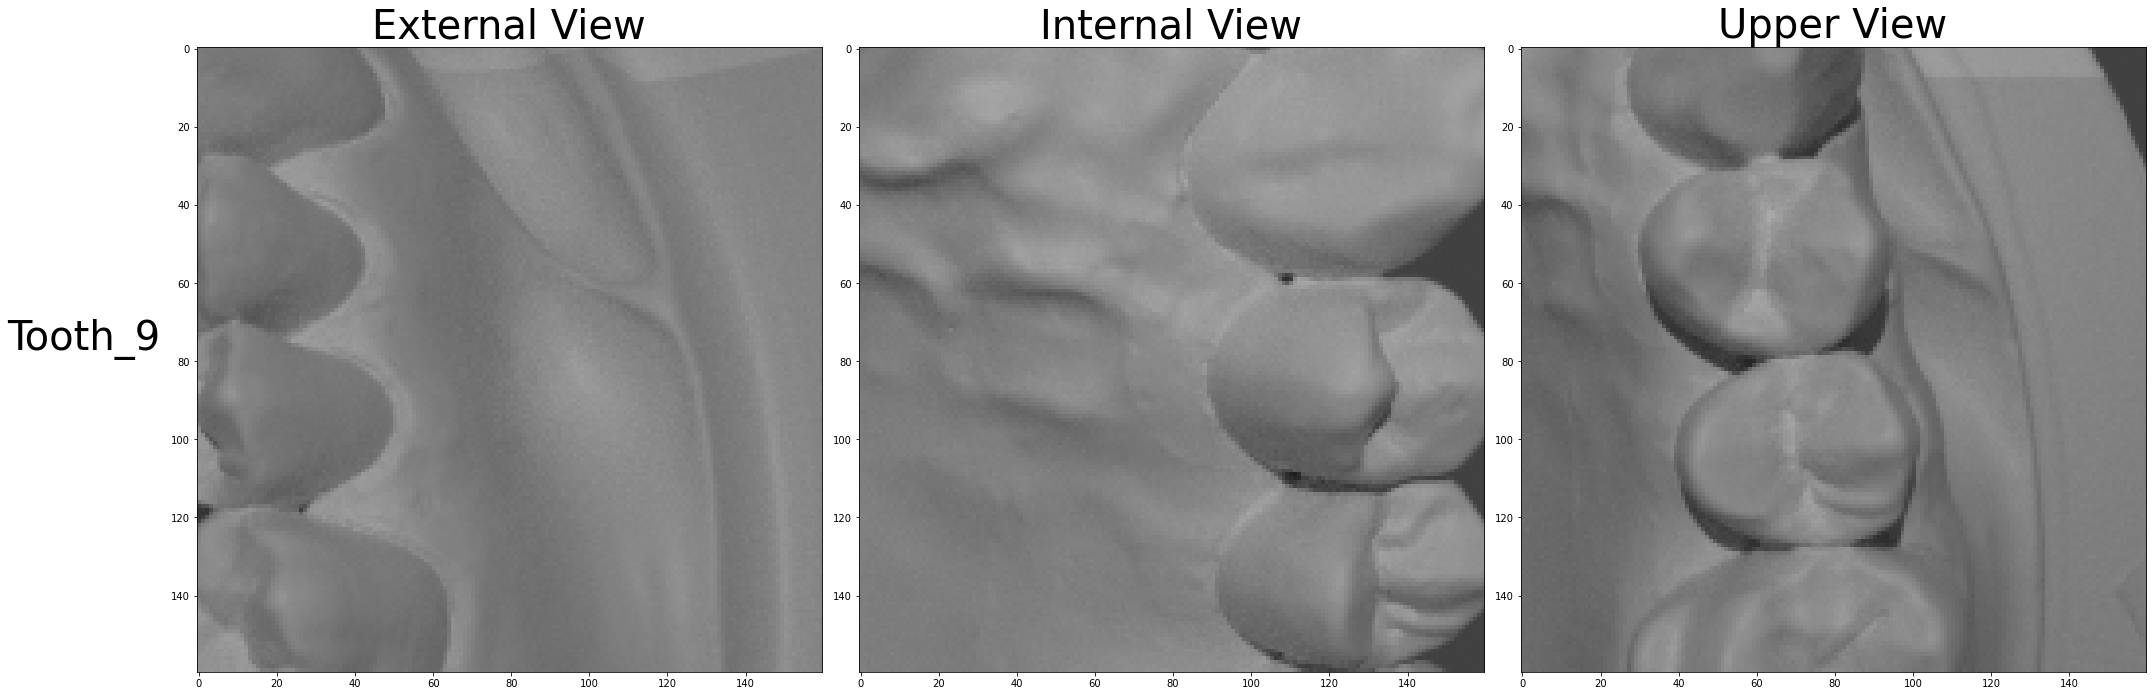

In [27]:
display_one_tooth(one_set,toothnum = t, rows = 1, cols=len(one_set),labels = labels)

## plot multiple teeth

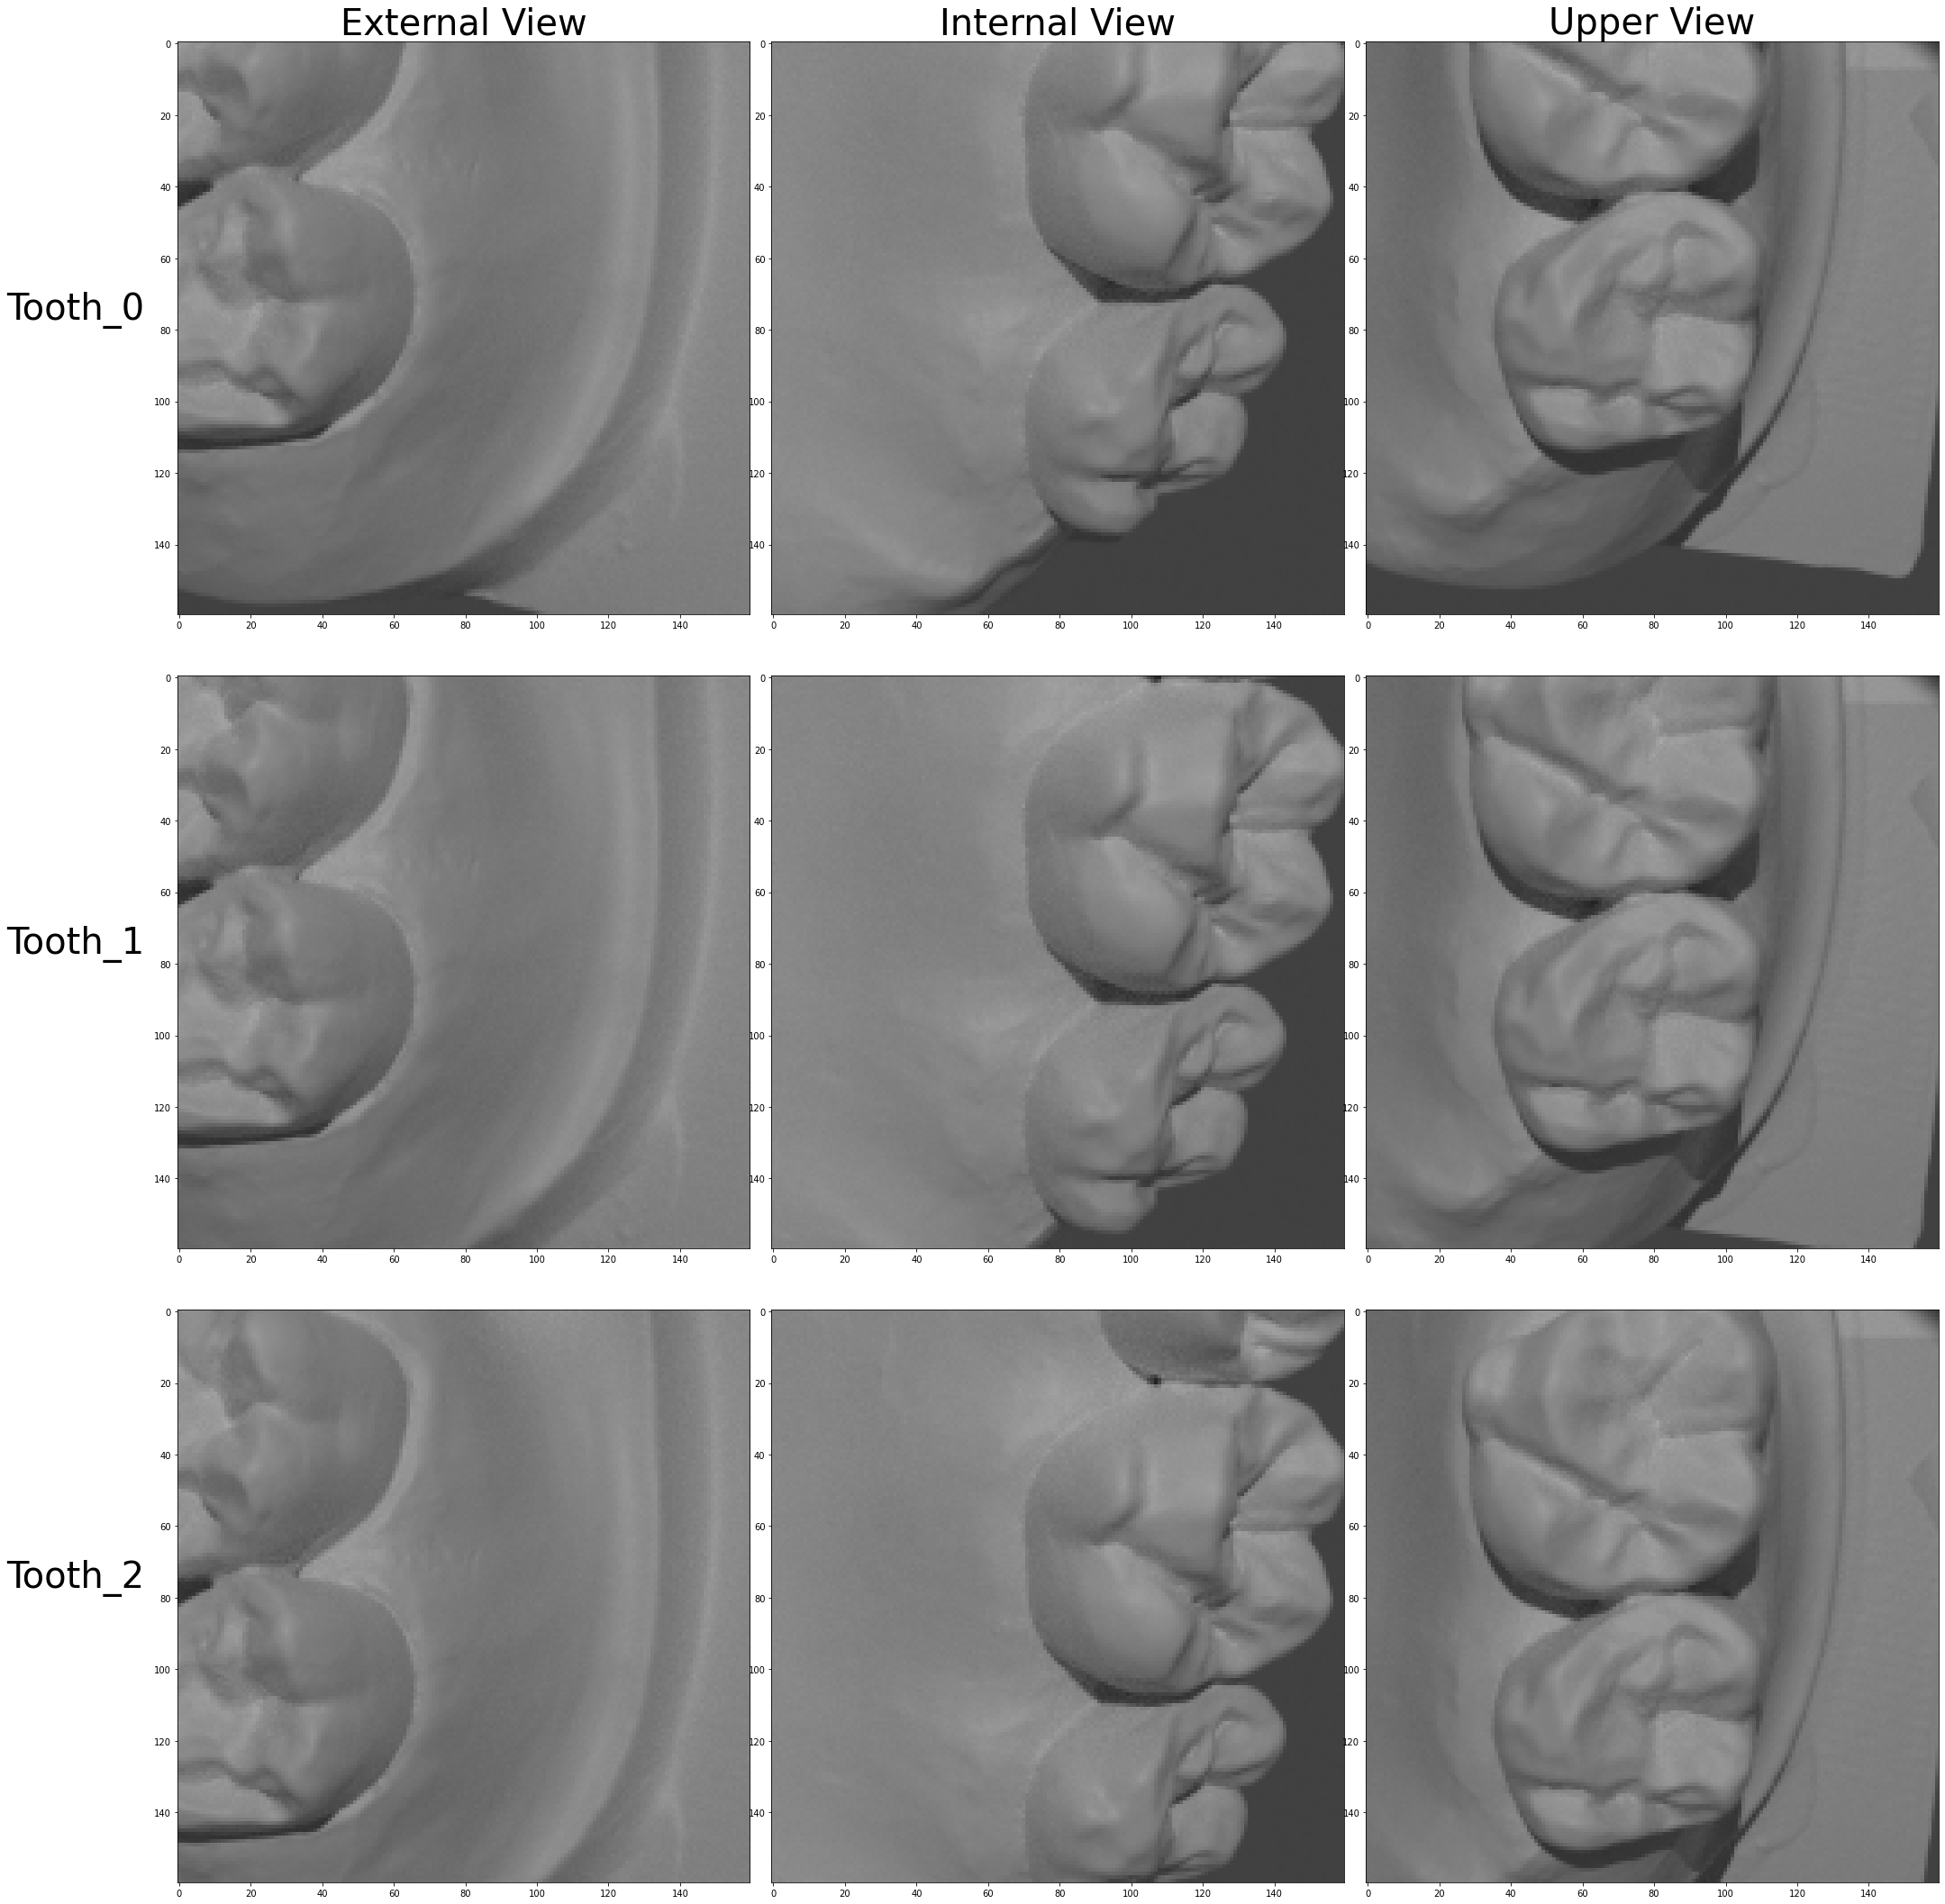

In [28]:
T = (0,3) # plot from tooth T[0] to tooth T[1]-1
many_images = [seq[T[0]:T[1]] for seq in list_sequences]
display_multiple_teeth(many_images,T, rows = len(list_sequences[0][T[0]:T[1]]), cols=len(many_images),labels = labels)

# Open3D basics 

Open3D offers an interactive visualization mode in a pop up window. 

Until the pop up window is not closed, either by pressing the key "q" or by clicking on the "x", no further code can be run.

The following set of instruction is printed out by pressing the key "h" while in visualization mode. 

### load one point cloud 

In [29]:
#load one point cloud 
# http://www.open3d.org/docs/release/python_api/open3d.geometry.PointCloud.html
test_num = 18
path = ply_folder+"/"+all_ply[test_num]
pcd = o3d.io.read_point_cloud(path)
print(pcd)
## how to access the points as an array
print(np.asarray(pcd.points))

PointCloud with 22204 points.
[[-8.76348  -8.76348  44.711634]
 [-8.663878 -8.773548 44.762998]
 [-8.554136 -8.773473 44.762617]
 ...
 [-5.234596  8.270661 42.731393]
 [-5.146378  8.297222 42.868621]
 [-5.054274  8.318493 42.978522]]


### visualization mode

To actually see the point cloud we need to use dedicated functions (eg the inbuilt "draw geometries") that plot the points in a 3D environments. 
We refer to this enviroment as **visualization mode**. 

Quite a lot is going on in visualization mode which allows both interactive visualization and also ways to extract data (see functions to delete planes of points or how to crop the point clouds in the next notebooks). 
As a start through visualization mode is possible for example to use several keys to interact with the pointcloud:

* [ + and -] to reduce or increase the size of the points 

* [L] change light settings

* [N] show the normals rotate and translate the point cloud. 

* [O] store settings such as light, size of the dots etc in a **myconfiguration_file** in .json format

* [P] store camera settings, eg point of view and zoom in a **myparams file** in .json format; this at the same time saves a Screen of the current view in ".png"

* [H] get a print out of the instructions, following a pic of them too. 




By default in initialization the latest visualization parameters saved are used. 
After saving new values by pressing "o" and "p" in visualization mode, is possible to load them as default by using the function:
> myparams, myconfiguration_file = last_visualization_parameters()

or equivalently re-run the initialization notebook
> %run "../Notebooks/initialization.ipynb"

if you dont want to use any previous parameters for the visualization, just comment the line with #. 


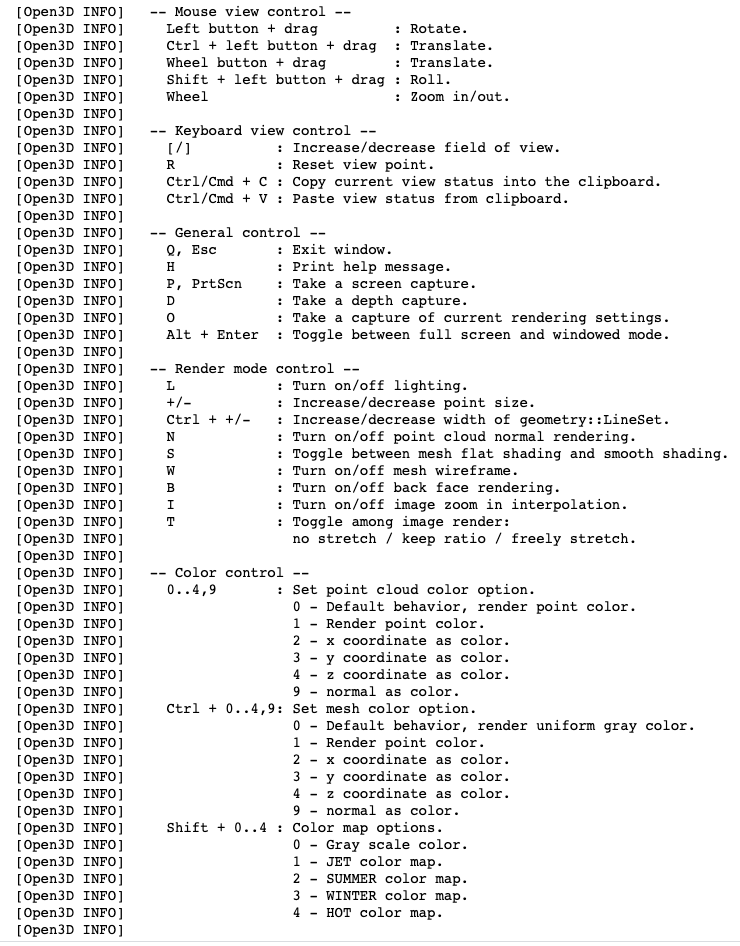

In [33]:
# instructions
Im(filename='../data/instructions.png',
  width = 500) 

### load visualization parameters (previously saved)

some starting ones are already in the data folder.

In [34]:
myparams, myconfiguration_file = last_visualization_parameters()
print (myparams)
print (myconfiguration_file)

../data/ScreenCamera_2021-01-07-20-28-12.json
../data/RenderOption_2021-01-07-20-28-10.json


### visualize point cloud- default function

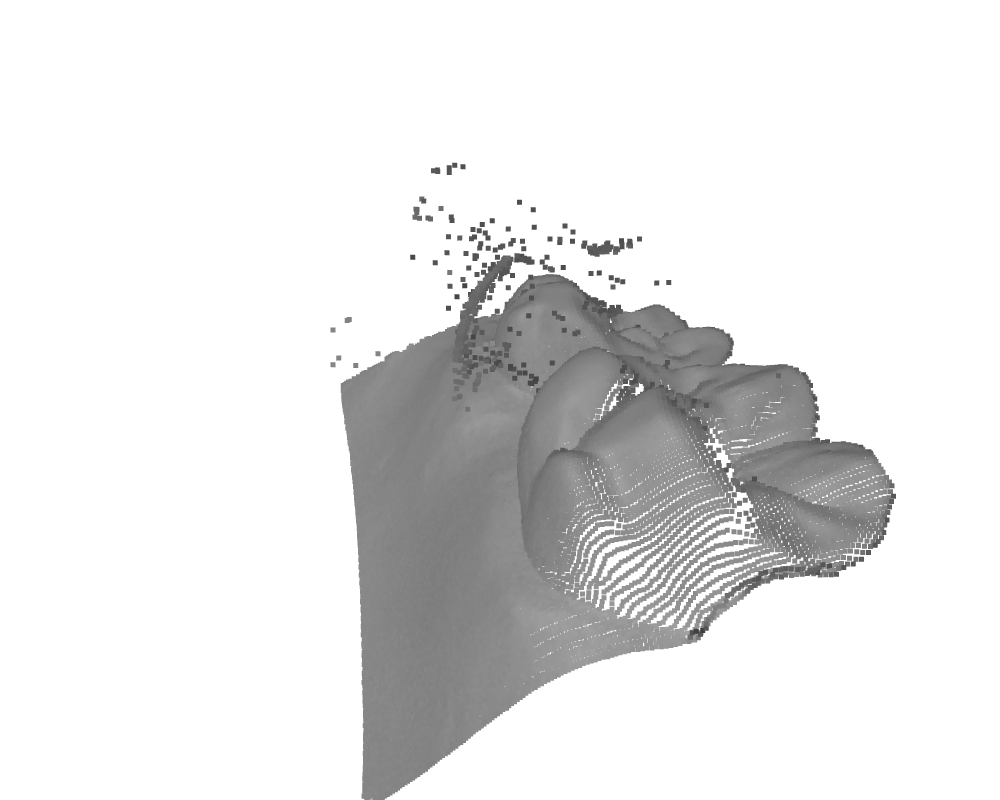

In [35]:
#simple point cloud visualization 
### visualize point cloud- opens a pop up window
mytitle = "generic_visualization"
o3d.visualization.draw_geometries([pcd], # input point cloud as a list
                                 width=1000, height=800,
                                 window_name='%s'%(mytitle)) 

# after manual changing in visualization mode
newest = last_file_containing("generic_visualization", extension = '.png')
Im(filename=newest,width = 600)

In [345]:
## if you have taken a picture by pressing P in the previous visualization 
## you can see it by uncommenting the following two lines, should be something like the previous one
## from whatever perspective

#newest = last_file_containing("Screen", extension = '.png')
#Im(filename=newest,width = 800)

### visualize point could -custom made

This custom visualization allows to play more with parameters and editors.
* pcl: the point cloud or list of point clouds. 
* mytuples:  allows to give a tuple of (labels,values) that are used in the window label and in the save file, this comes handy while testing the effects of chaging parameters 
* params and configuration_file: allow to load settings in the visualization, as previously explained
* take_screen_shot: if true automatically takes a screen of the last view before closing the window and saves it with appropriate unique naming
* rotate: False, True or interactive. 
    * if set to False, the pcl is static
    * If set to True the pcl rotates in this case set take_screen_shot to False to avoid a black screen picture. 
    * If set to "interactive"some custom keys can be implemented, as example currently:
            >key_to_callback[ord("R")] = load_render_option
            >key_to_callback[ord("S")] = spin the pcl
            >key_to_callback[ord("B")] = change_background_to_black
            >key_to_callback[ord("W")] = change_background_to_white
            >key_to_callback[ord("A")] = plot_axes
            
* onewindow: if there is a list of point clouds given as input, if onewindow is set to True, they will all be plot in the same visualization, otherwise they will be plot in different windows (always needing to close one to open the next). 

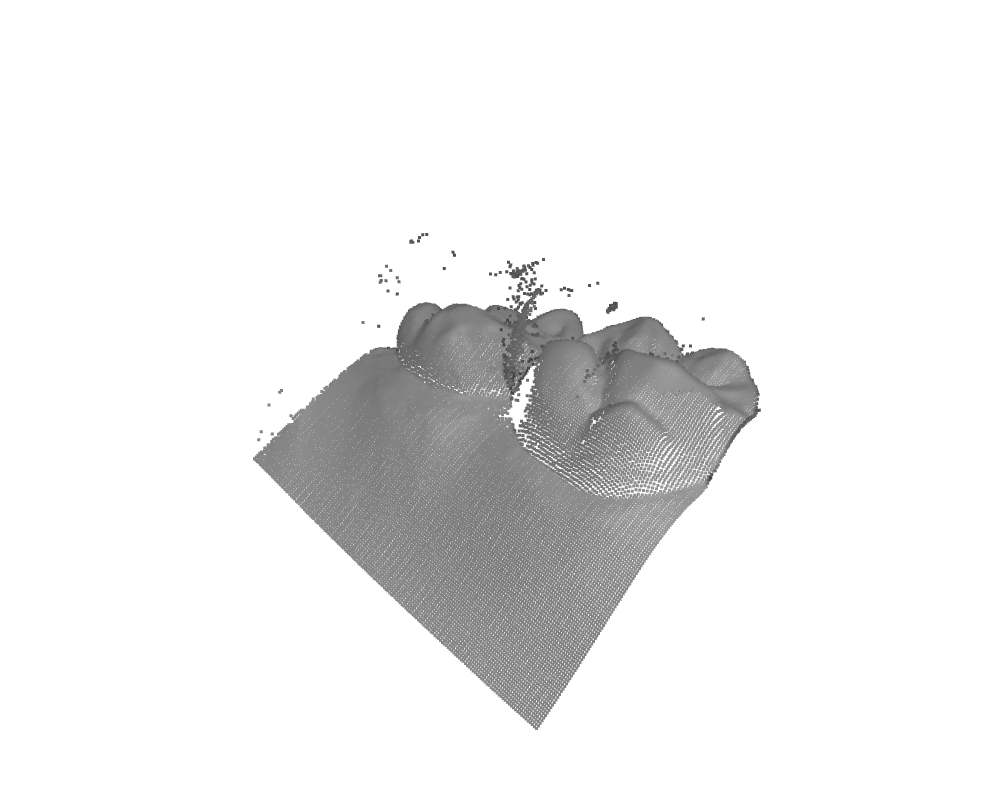

In [25]:
# https://github.com/intel-isl/Open3D/issues/1483
custom_draw_geometry(pcd, # point cloud
                     mytitle = mytimestamp()+"visualization_with_given_parameters",
                     params =specific_screen, # parameter for camera point view, json file via pressing P
                     configuration_file = specific_render, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False) 

newest = last_file_containing("visualization_with_given_parameters", extension = '.png')
Im(filename=newest,width = 400) 

### Downsampling

In order to speed up the process and make the computation feasable with big point clouds as input, it is necessay to downsample. 
The higher the voxel size the less points we have. 

In [41]:
down_pcd = pcd.voxel_down_sample(voxel_size=0.5)
print ("number of points " ,len(np.array(pcd.points)))
print ("number of points with voxel down sample" ,len(np.array(down_pcd.points)))
#o3d.visualization.draw_geometries([down_pcd.paint_uniform_color([0.8, 0.8, 0.8])])

custom_draw_geometry(down_pcd, # point cloud
                     mytitle =  "down_pcd",
                     params = specific_screen, # parameter for camera point view, json file via pressing P
                     configuration_file = specific_render, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False)  

number of points  22204
number of points with voxel down sample 2065


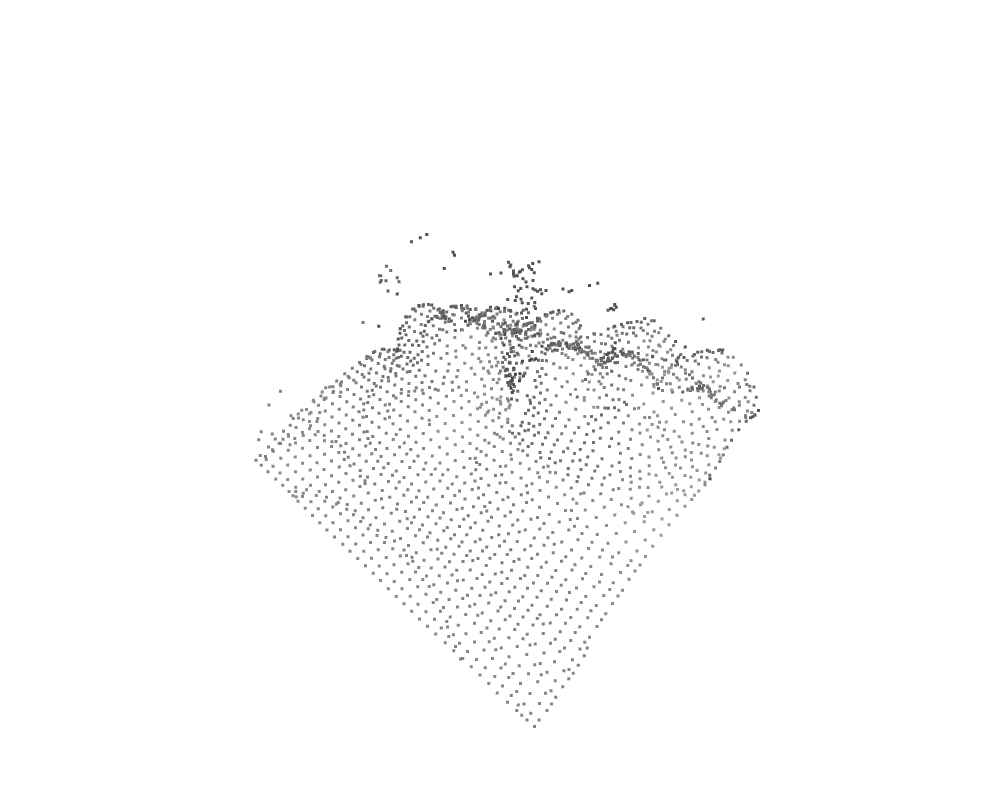

In [42]:
newest = last_file_containing("down_pcd", extension = '.png')
Im(filename=newest,width = 400) 

### Outlier removal

Here we experimented with the various outlier detection functions of Open3D and plotted out various results while changing the parameters.
* statistical
* radius
* hidden points

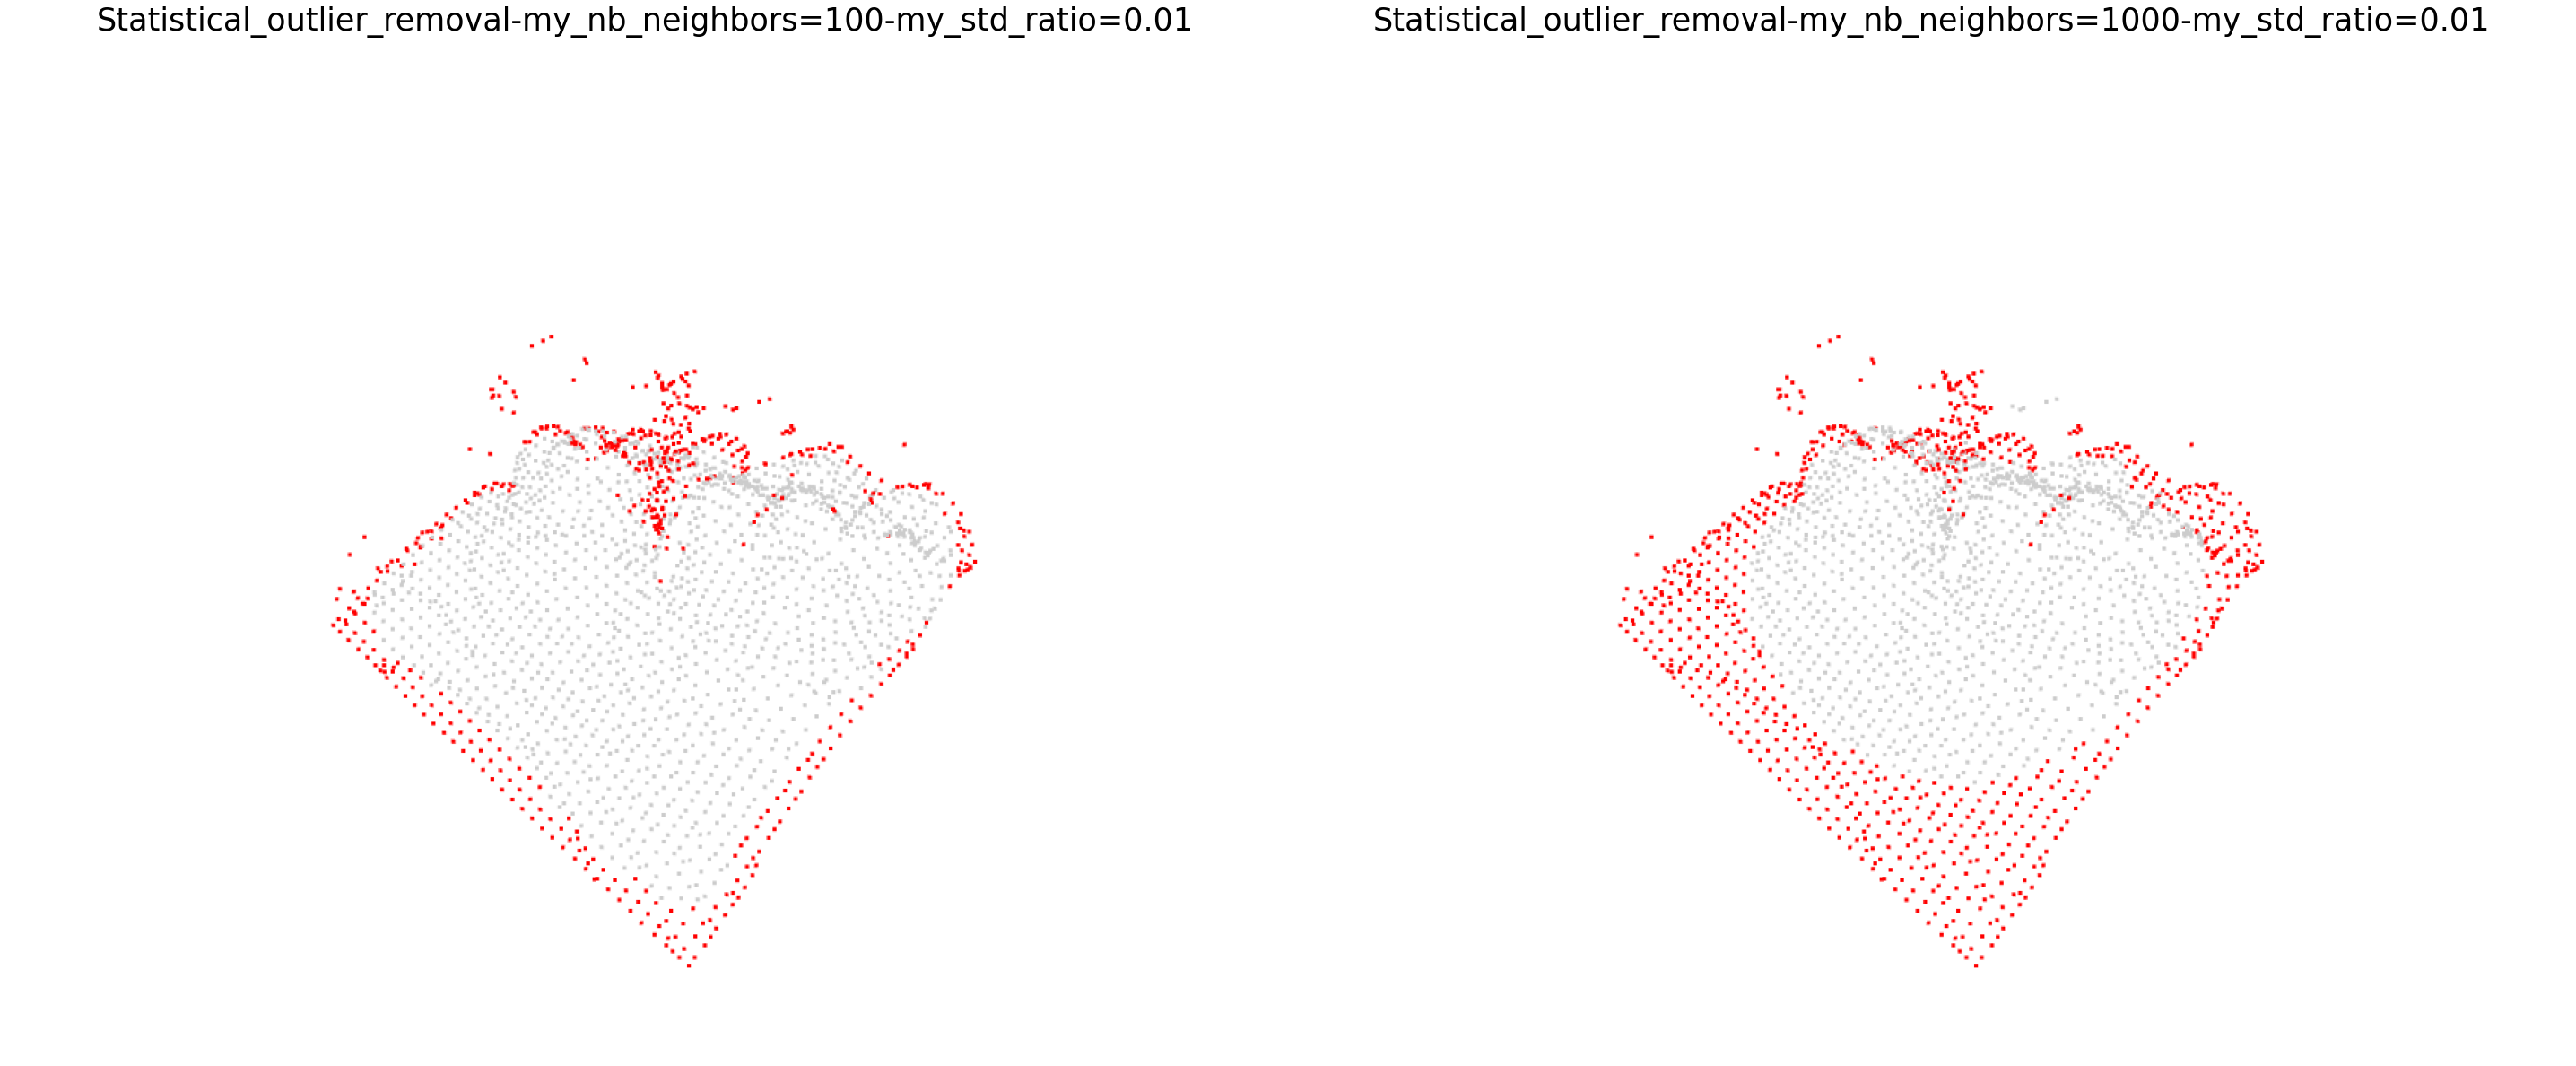

In [29]:
### Statistical oulier removal
# effect is to highlight the contours
# increasing the number of neightbors more outliers in the countours
# de creasing the number std_ratio gives wider contours
mytitle ="Statistical_outlier_removal"

# check how different parameters influence the outlier removal
my_nb_neighbors=[100,1000]
my_std_ratio=[0.01,0.01]

my_n = len(my_std_ratio)


for i in range(my_n):
    
    parameters = (my_nb_neighbors[i],my_std_ratio[i])
    parameters_labels = ("my_nb_neighbors","my_std_ratio")
    mytuples = list(zip(parameters_labels,parameters))

    cloud, ind = down_pcd.remove_statistical_outlier(nb_neighbors=my_nb_neighbors[i],
                                                    std_ratio=my_std_ratio[i])
    display_inlier_outlier(down_pcd, ind, 
                           mytitle, mytuples,
                           params =specific_screen, 
                           configuration_file = specific_render, 
                           take_screen_shot = True,
                           rotate = False,
                           onewindow = True
                          )
# visualization
paths_temp = last_n_files_containing("Statistical",n= my_n, extension = '.png')
img_temp = [cv2.imread(path) for path in paths_temp]

rows = 1
cols = my_n
fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(40, 40))
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(plt_format(img_temp[j]))
        axes[i][j].set_title(paths_temp[j][2:-4],fontsize = 35)
        axes[i][j].axis('off')

fig.tight_layout()    
plt.show()

['./Radius_oultier_removal-nb_points=25-radius=0.5.png', './Radius_oultier_removal-nb_points=5-radius=0.7.png']


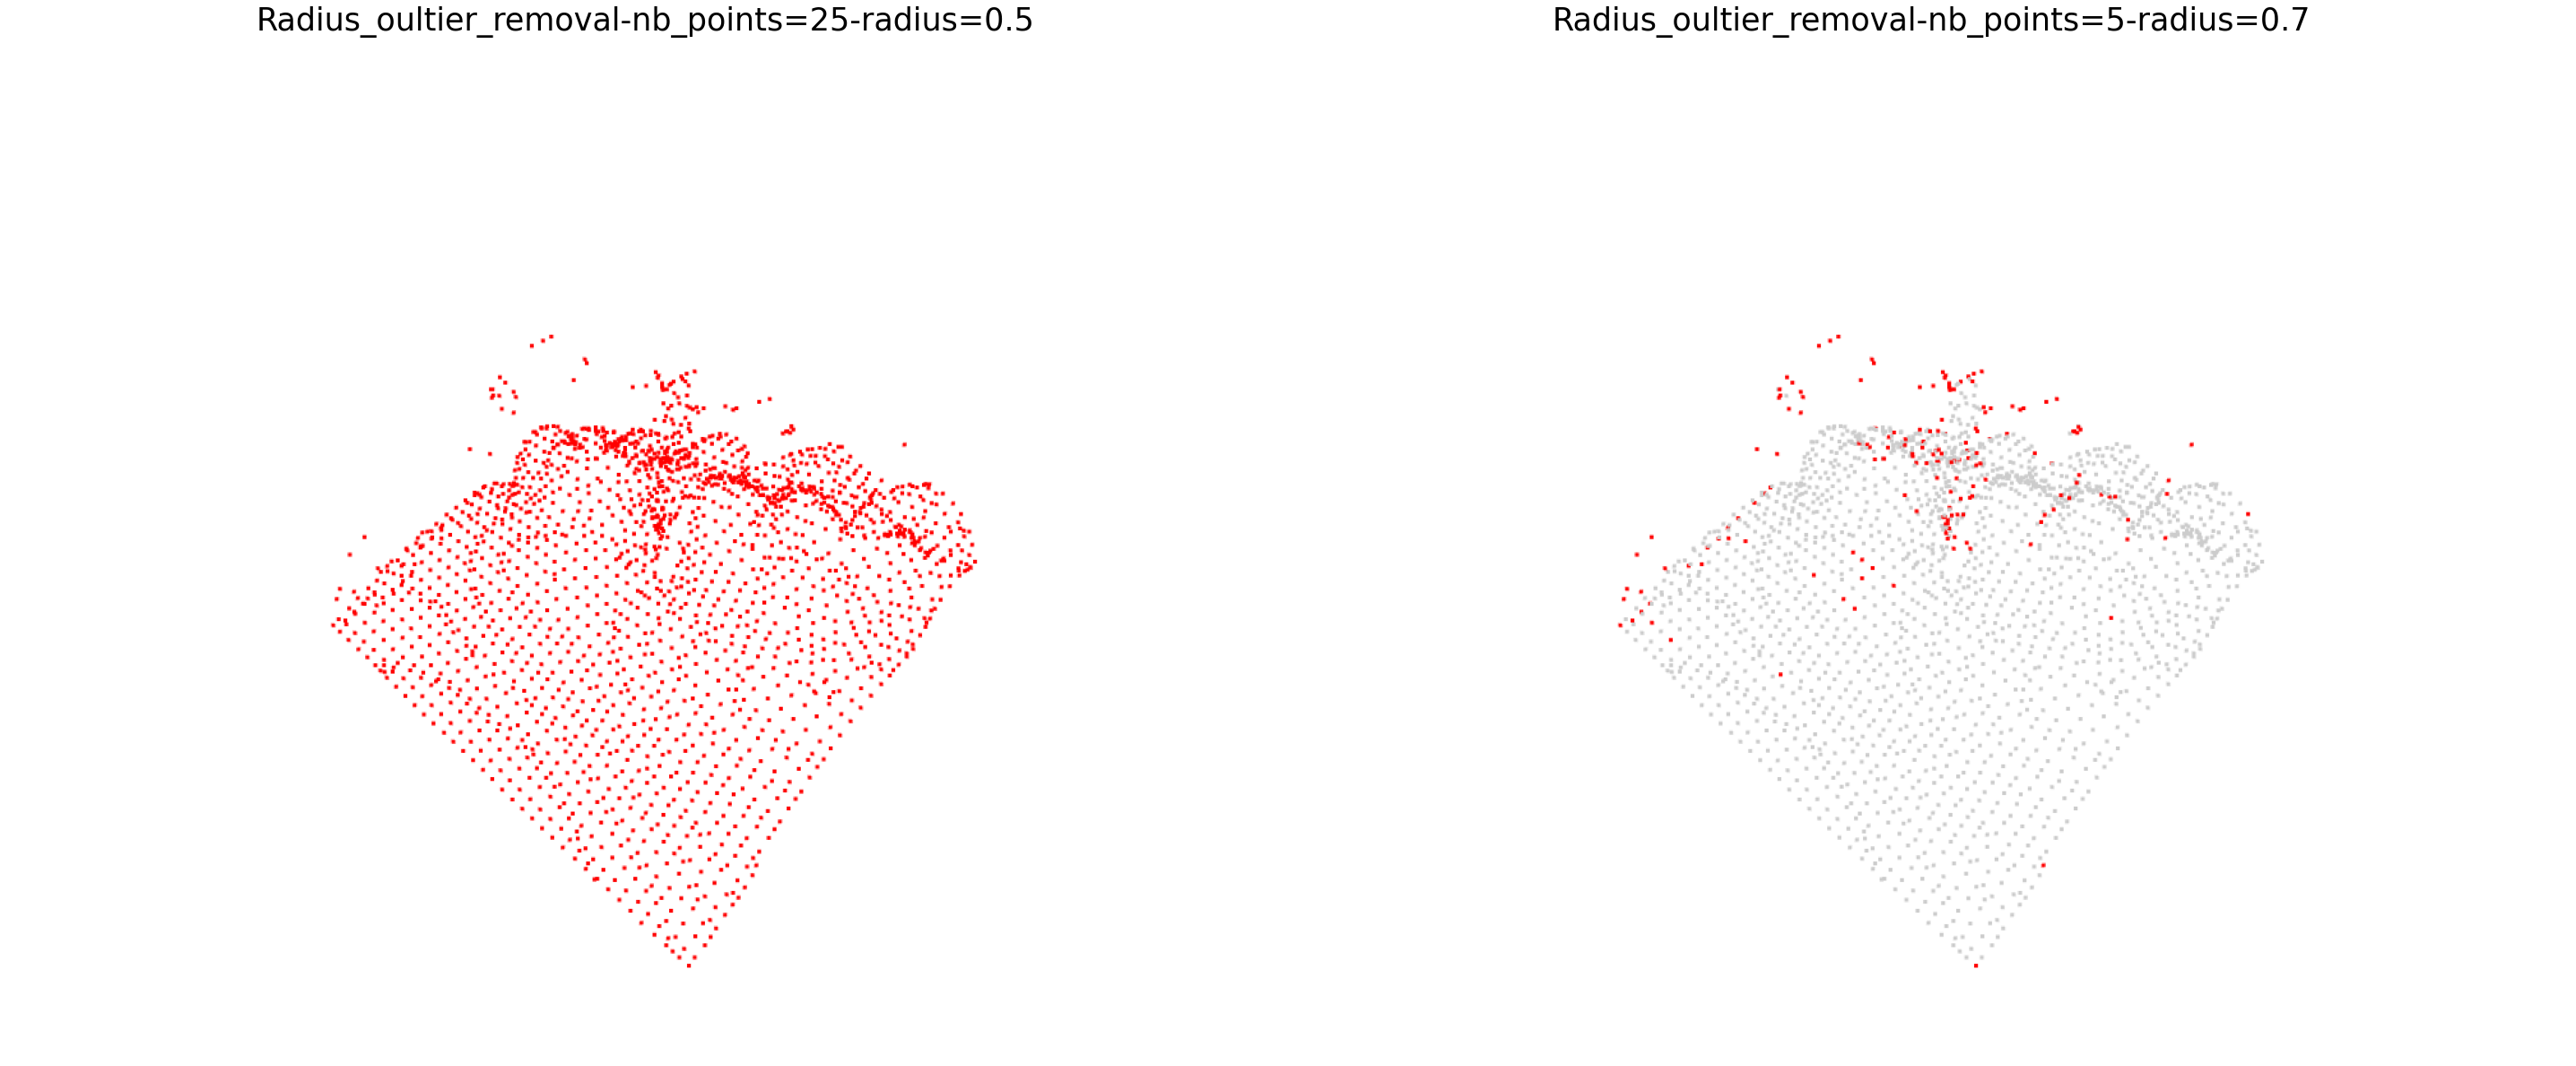

In [30]:
### Radius oulier removal
mytitle = "Radius_oultier_removal"

#test with different parameters
nb_points = [25,5]
radius = [0.5,0.7]

my_n = len(nb_points)
for i in range(my_n):
    
    parameters = (nb_points[i],radius[i])
    parameters_labels = ("nb_points","radius")
    mytuples = list(zip(parameters_labels,parameters))

    cloud, ind = down_pcd.remove_radius_outlier(parameters[0], parameters[1])
    
    display_inlier_outlier(down_pcd, ind, 
                           mytitle, mytuples,
                           params =myparams, 
                           configuration_file = myconfiguration_file, 
                           take_screen_shot = True,
                           rotate = False,
                           onewindow = True)

#visualization  
paths_temp = last_n_files_containing("Radius",n= my_n, extension = '.png')
print (paths_temp)
img_temp = [cv2.imread(path) for path in paths_temp]

rows = 1
cols = my_n
fig, axes = plt.subplots(nrows=rows,ncols=cols,squeeze=False,figsize=(40, 40))
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(plt_format(img_temp[j]))
        axes[i][j].set_title(paths_temp[j][2:-4],fontsize = 35)
        axes[i][j].axis('off')

fig.tight_layout()    
plt.show()
#display_inlier_outlier(down_pcd, ind)

28.78500029732336
Define parameters used for hidden_point_removal
Get all points that are visible from given view point


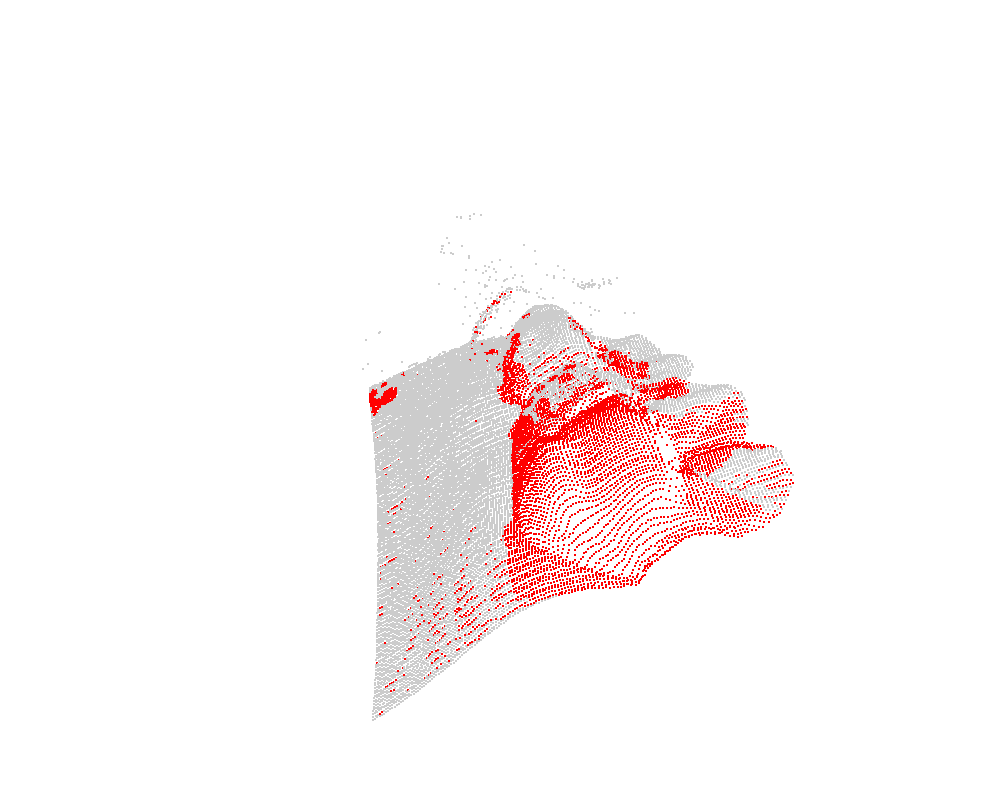

In [32]:
### hidden points removal
#this function allows to remove points that wouldnt be visible from a certain prespective 
#(eg if we are looking at an object from behind, the point in the front should be deleted)
# anyhow it is difficult to find an application of this function without a known geometry, so we havent really used this.

diameter = np.linalg.norm(
                          np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
print (diameter)
print("Define parameters used for hidden_point_removal")
a = 10
b = 0
camera = [a, b, diameter]
radius = diameter * 200

print("Get all points that are visible from given view point")
pcd_clean, pt_map = pcd.hidden_point_removal(camera, radius)

#print("Visualize result")
custom_draw_geometry_outliers(pcd, pt_map, 
                              mytitle = "Radius_oulier_removal", mytuples = mytuples,
                              take_screen_shot = False,
                              #params = myparams,  # parameter for camera point view, json file via pressing P
                              #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                              rotate = "interactive")
#press P in visualization mode
Im(filename=last_file(".png"),
  width = 500, height = 400) 

## custom visualization of outliers 

Here just an example on how it is possible to customize the visualizations beyound the default plots.

loading parameters: 
  ./ScreenCamera_2021-01-16-22-46-03.json
loading configuration file: 
  ./RenderOption_2021-01-16-22-46-03.json


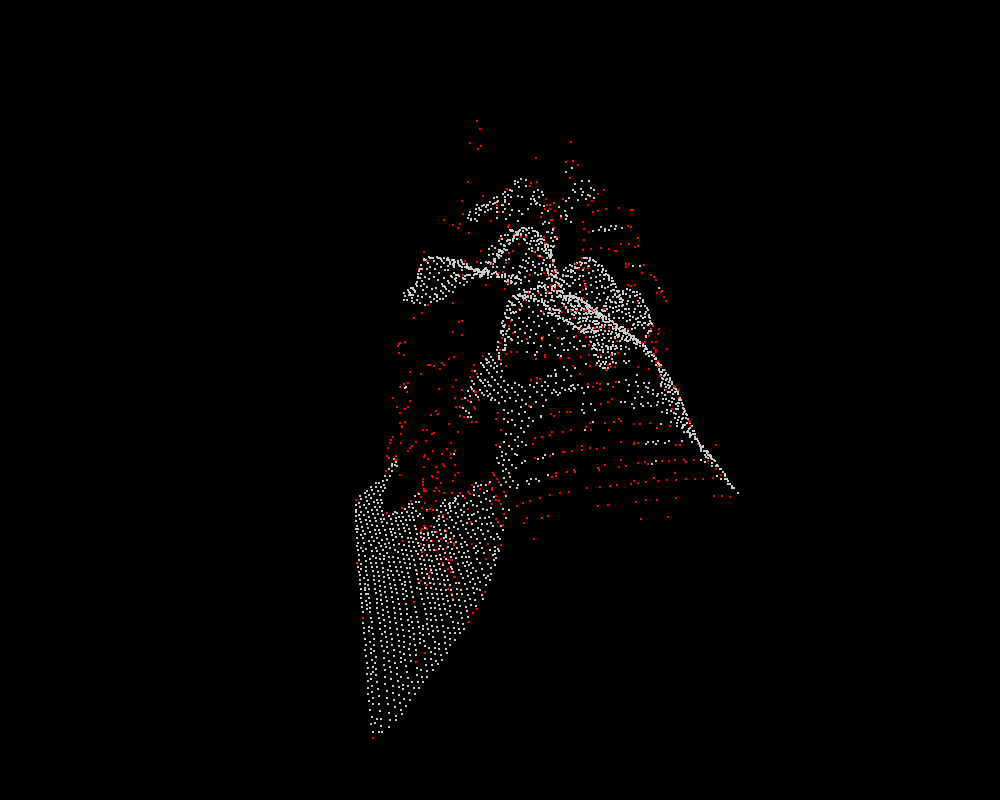

In [367]:
## same as per the custom draw geometries , this gives more personalization options possible

custom_draw_geometry_outliers(down_pcd, ind, 
                              mytitle = "Radius_oulier_removal", mytuples = mytuples,
                              #params = myparams,  # parameter for camera point view, json file via pressing P
                              take_screen_shot = False,
                              #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                              rotate = "interactive")
#press P in visualization mode
Im(filename=last_file(".png"),
  width = 500, height = 400) 